In [ ]:
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np
from aicsimageio.aics_image import AICSImage


savedir = Path("../data/SIM/myosin")

In [2]:
image = AICSImage(savedir / "Image 20_SIM.czi")

In [3]:
image_data = image.get_image_data("CZYX", T=0)

In [4]:
image_data.shape
image_mean = np.mean(image_data, axis=1)

In [5]:
image.physical_pixel_sizes

PhysicalPixelSizes(Z=0.14412244897959187, Y=0.03130297426413931, X=0.03130297426413931)

In [13]:
with h5py.File(savedir / "Image20_myosin_SIM2.h5", "w") as f:
    dataset = f.create_dataset("Data", data=image_data)
    dataset.attrs["dim_order"] = "CZYX"
    dataset.attrs["channels"] = ["desmin", "myosin"]
    dataset.attrs["pixel_sizes"] = np.array(
        image.physical_pixel_sizes, dtype=np.float32
    )

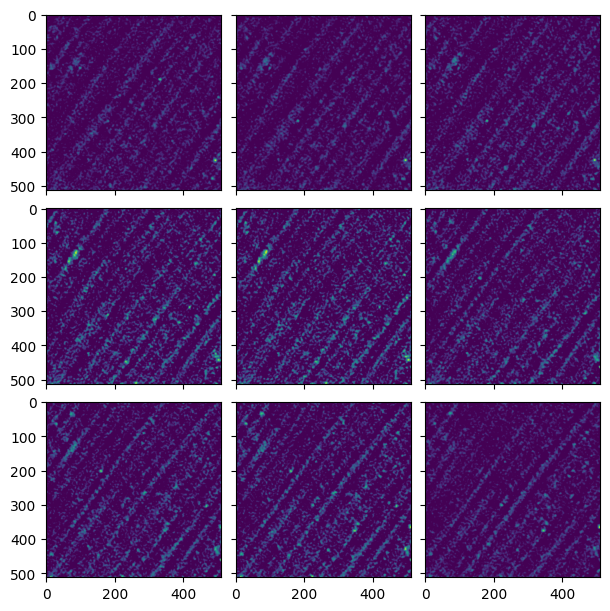

In [12]:
fig, axes = plt.subplots(
    3, 3, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True
)
z_inds = np.linspace(0, image_data.shape[1] - 1, 25)
for i, ax in enumerate(axes.flat):
    ax.imshow(image_data[1, round(z_inds[i])])